In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pathlib import Path
from fastai import *
from fastai.vision import *
from fastai.vision.models.wrn import *
from fastai.utils.mem import *
from fastai.text import *

## CIFAR-10

### Daten

In [40]:
path = untar_data(URLs.CIFAR); path

WindowsPath('C:/Users/DS/.fastai/data/cifar10')

In [41]:
xtra_tfms = [cutout(n_holes=(1,1),length=(16,16),p=.5)]
tfms = get_transforms(xtra_tfms=xtra_tfms)

In [42]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=32)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\DS\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\DS\.fastai\data\cifar10;

Test: None

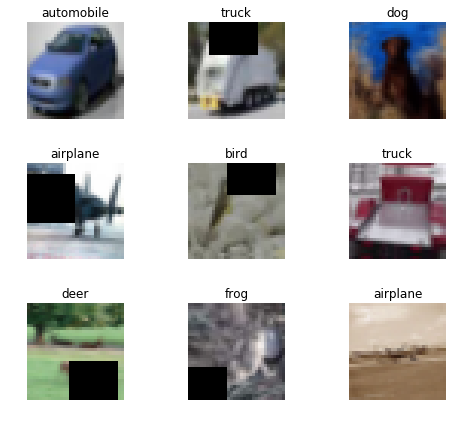

In [64]:
data.show_batch(rows=3, figsize=(7,6), return_fig=True)

### Modell - Resnet50

epoch,train_loss,valid_loss,accuracy,time
0,1.558412,1.249952,0.567600,03:10
1,1.119957,0.906234,0.683000,03:06
2,0.990002,0.770855,0.727200,03:04
3,0.928319,0.763187,0.727800,03:04


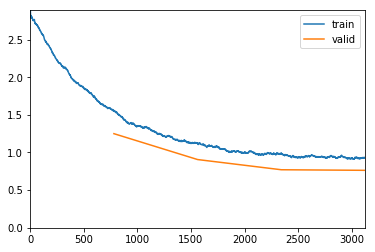

In [43]:
learn = cnn_learner(data, models.resnet50, metrics = [accuracy], callback_fns=ShowGraph)
learn.fit_one_cycle(4, 1e-3, wd=0.03)

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


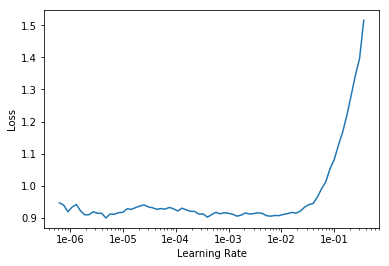

In [45]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.870785,0.686955,0.757400,03:36
1,0.824700,0.645341,0.773900,03:35
2,0.790037,0.584998,0.794000,03:35
3,0.741271,0.537549,0.819100,03:35
4,0.696441,0.516029,0.822900,03:42
5,0.588891,0.491289,0.828500,03:49
6,0.576167,0.434537,0.852000,03:40
7,0.530891,0.424042,0.858000,03:45
8,0.495177,0.412420,0.861600,03:45
9,0.436266,0.403763,0.865300,03:40


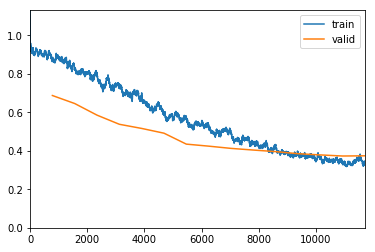

In [46]:
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-5,1e-3), wd=0.03)

### Results

In [47]:
interp = ClassificationInterpretation.from_learner(learn)

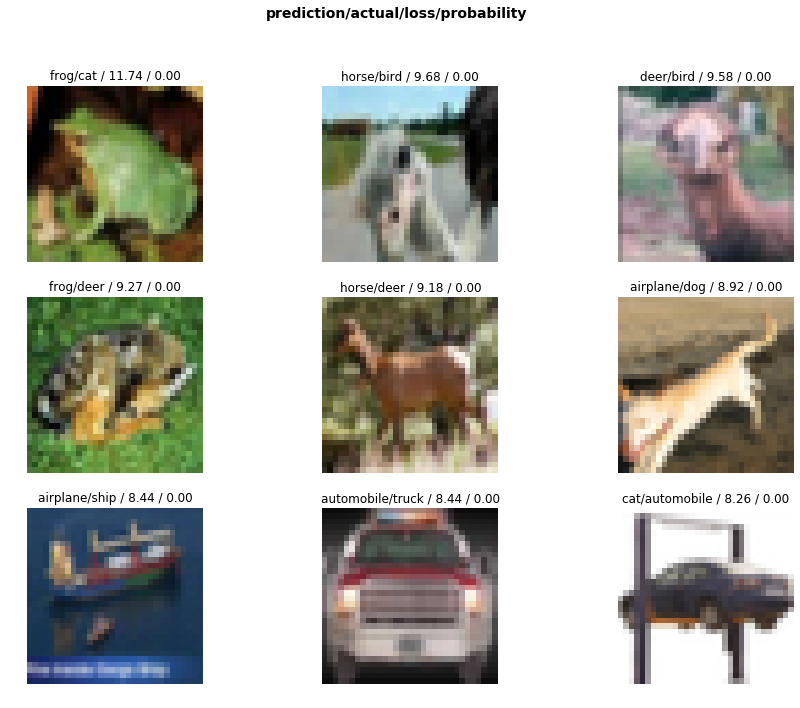

In [48]:
interp.plot_top_losses(9,figsize=(15,11),heatmap=False)

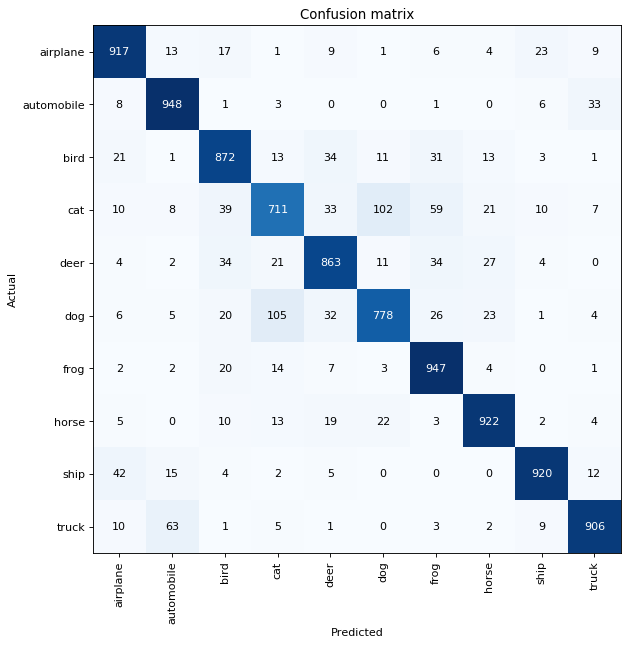

In [49]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=80)

In [50]:
interp.most_confused(min_val=50)

[('dog', 'cat', 105),
 ('cat', 'dog', 102),
 ('truck', 'automobile', 63),
 ('cat', 'frog', 59)]

## Oxford-IIIT Pets

### Daten

In [22]:
path = untar_data(URLs.PETS); path

WindowsPath('C:/Users/DS/.fastai/data/oxford-iiit-pet')

In [23]:
path_anno = path/'annotations'
path_img = path/'images'

In [24]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [25]:
fnames = get_image_files(path_img)
fnames[:5]

[WindowsPath('C:/Users/DS/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 WindowsPath('C:/Users/DS/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
 WindowsPath('C:/Users/DS/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
 WindowsPath('C:/Users/DS/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),
 WindowsPath('C:/Users/DS/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]

In [26]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),size=224, bs=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: C:\Users\DS\.fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: C:\Users\DS\.fastai\data\oxford-iiit-pet\images;

Test: None

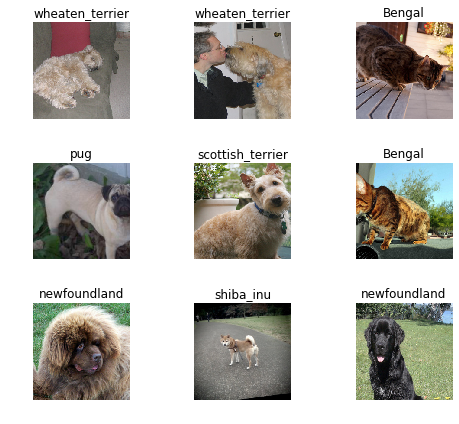

In [24]:
data.show_batch(rows=3, figsize=(7,6))

In [25]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training ResNet50

In [27]:
learn = cnn_learner(data, models.resnet50, metrics = [accuracy,error_rate], callback_fns=ShowGraph)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


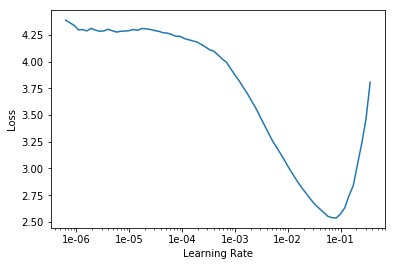

In [29]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.652770,0.279416,0.907307,0.092693,02:04
1,0.511626,0.467233,0.843031,0.156969,02:01
2,0.468944,0.308993,0.895805,0.104195,02:02
3,0.341232,0.234888,0.930311,0.069689,02:03
4,0.211008,0.190848,0.939107,0.060893,02:02
5,0.141728,0.183298,0.947226,0.052774,02:02


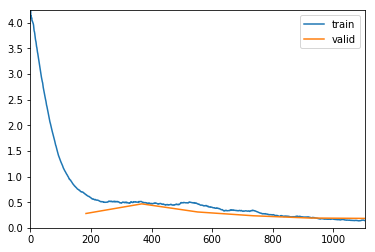

In [30]:
learn.fit_one_cycle(6, 3e-3)

## Results

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

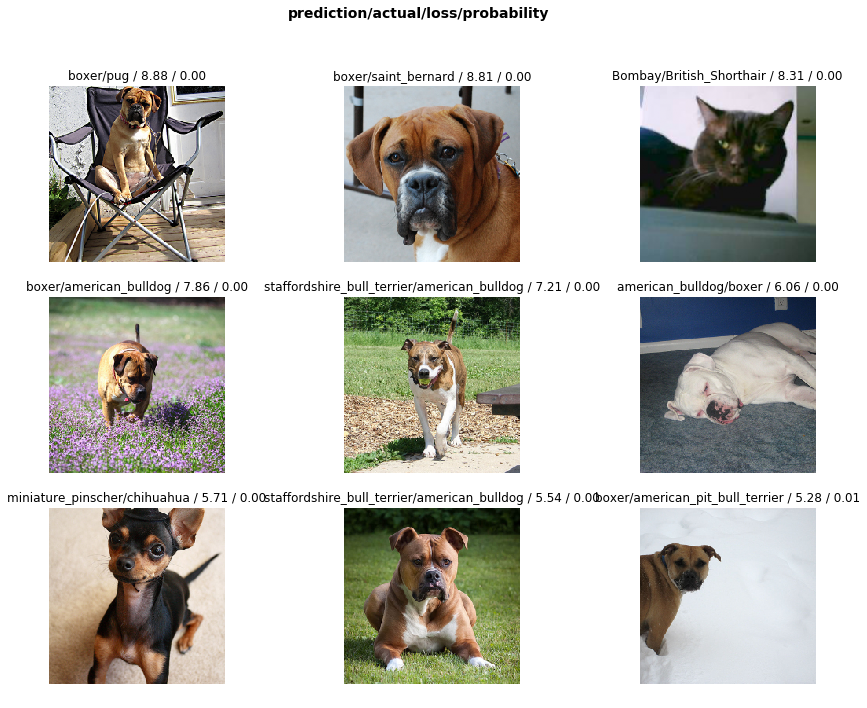

In [32]:
interp.plot_top_losses(9,figsize=(15,11),heatmap=False)

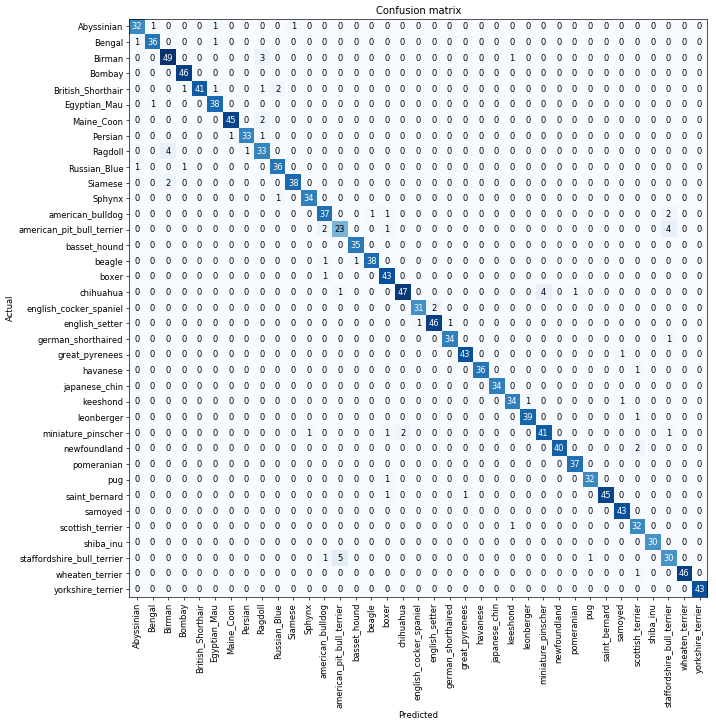

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [35]:
interp.most_confused(min_val=4)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4)]

# Language Model

## Penn Treebank

In [47]:
path = Path('../Data/ptb')

In [48]:
data_lm = (TextList.from_folder(path)
            .filter_by_folder(include=['train','valid', 'test'])
            .split_by_folder(train='train', valid='valid')
            .label_for_lm()
            .databunch(bs=32))

In [49]:
data_lm.show_batch()

idx,text
0,consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate \n a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than n years ago researchers reported \n the asbestos fiber xxunk is unusually xxunk once it enters the xxunk with even brief exposures to it
1,began a strike after the united steelworkers local n rejected a new contract on tuesday \n the previous contract between xxunk 's ohio steel tube division and the union expired at midnight tuesday \n the union vote to reject the proposed pact was n \n xxunk said it does n't expect a xxunk strike \n it said it has taken measures to continue shipments during the
2,it is interesting to see the fundamental stock pickers xxunk xxunk on program trading when the markets decline while xxunk the great values still xxunk as the markets rise \n could rising volatility possibly be related to uncertainty about the economics of stocks instead of the evil xxunk of program - trading xxunk \n some of the proposed xxunk for what is labeled program - trading volatility could
3,would have on their ability to spot xxunk xxunk of trading activity buying or selling by more than one officer or director within a short period of time \n according to some estimates the rule changes would cut insider filings by more than a third \n the sec 's mr . lane xxunk disputed those estimates \n the rules will eliminate filings xxunk divisions such as sales
4,\n the company focuses on the xxunk aspects says andrew e. philip president \n xxunk now trains sales help to advise customers on the best xxunk styles \n but cosmetics firms still have one big marketing edge they xxunk sales people with commissions \n jewelry makers rarely pay commissions and are n't expected to anytime soon \n odds and ends \n despite growing interest


In [50]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, pretrained=True, drop_mult=0.3, callback_fns=ShowGraph)

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


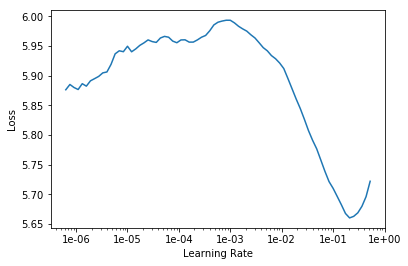

In [52]:
learn.recorder.plot(skip_end=15)

epoch,train_loss,valid_loss,accuracy,time
0,4.465699,4.260358,0.277311,00:53


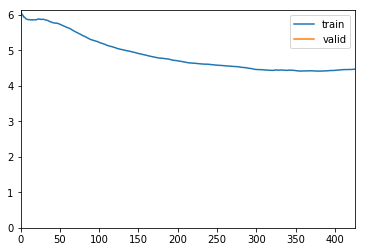

In [53]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.264372,4.148765,0.290612,01:11
1,4.082714,4.029644,0.302574,01:11
2,3.862846,3.946265,0.312369,01:11
3,3.629184,3.911158,0.315441,01:12
4,3.404435,3.911527,0.315612,01:12
5,3.219727,3.929653,0.315874,01:12
6,3.073853,3.946010,0.314141,01:11
7,2.960796,3.951975,0.315586,01:12
8,2.891085,3.960929,0.315257,01:12
9,2.870057,3.995488,0.313721,01:12


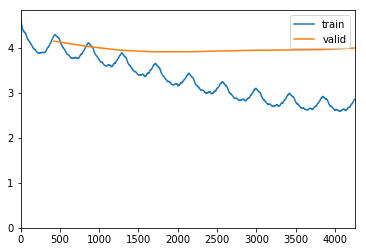

In [54]:
learn.unfreeze()
learn.fit_one_cycle(10,1e-3,moms=(0.8,0.7))

Overfitting, daher mit mehr Dropout versuchen

In [55]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, pretrained=True, drop_mult=1.0, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,4.926701,4.394285,0.263774,00:54


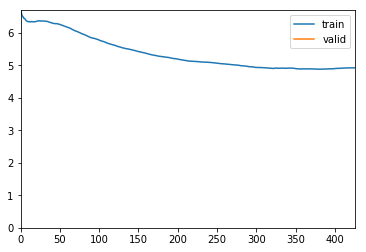

In [56]:
learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.707874,4.296286,0.274094,01:12
1,4.501969,4.160029,0.288419,01:11
2,4.303938,4.054800,0.298989,01:12
3,4.123868,3.975021,0.307642,01:12
4,3.991194,3.924800,0.313065,01:12
5,3.872621,3.892653,0.316006,01:11
6,3.788568,3.869956,0.318435,01:11
7,3.731092,3.855814,0.320010,01:12
8,3.695735,3.850352,0.320772,01:12
9,3.684691,3.852511,0.320615,01:11


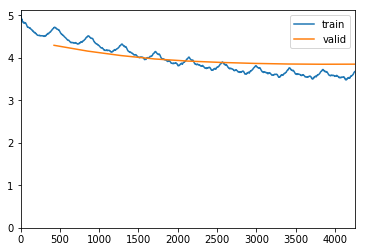

In [57]:
learn.unfreeze()
learn.fit_one_cycle(10,1e-3,moms=(0.8,0.7))

In [59]:
perplexity = math.exp(3.850352); perplexity

47.009607701492676